In [1]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score

In [3]:
# load the dataset
url = 'https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv'
boston = pd.read_csv(url)

In [4]:
# Display the first few rows of the dataset
boston.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


## Task 2: Data Preprocessing
#### Notebook: notebooks/Data_Preprocessing.ipynb Steps:
##### Handle missing values and outliers

In [5]:
# Check for missing values
print("\nChecking for missing values:")
print(boston.isnull().sum())


Checking for missing values:
crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64


#### There is no missing values.

<Axes: >

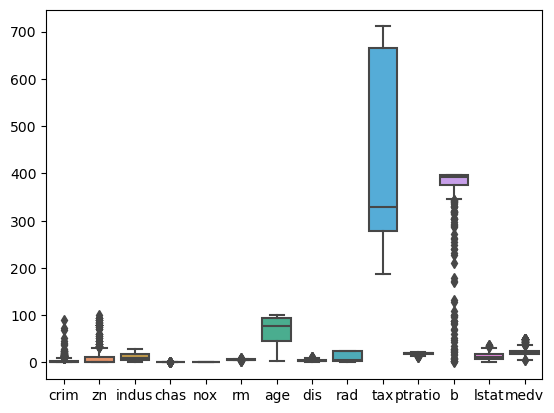

In [25]:
# box plot before handeling outliers
import seaborn as sns
# Identifying numerical columns
numerical_columns = boston.select_dtypes(include=['int64', 'float64']).columns
sns.boxplot(data=boston[numerical_columns])

In [8]:
# Identifying outliers using the IQR method
Q1 = boston.quantile(0.25)
Q3 = boston.quantile(0.75)
IQR = Q3 - Q1

In [9]:
print("\nIQR values for each column:")
print(IQR)


IQR values for each column:
crim         3.595038
zn          12.500000
indus       12.910000
chas         0.000000
nox          0.175000
rm           0.738000
age         49.050000
dis          3.088250
rad         20.000000
tax        387.000000
ptratio      2.800000
b           20.847500
lstat       10.005000
medv         7.975000
dtype: float64


In [10]:
# Defining outliers as points outside 1.5*IQR range
outliers = ((boston < (Q1 - 1.5 * IQR)) | (boston > (Q3 + 1.5 * IQR)))

In [11]:
# Displaying the count of outliers per column
print("\nOutliers per column:")
print(outliers.sum())


Outliers per column:
crim       66
zn         68
indus       0
chas       35
nox         0
rm         30
age         0
dis         5
rad         0
tax         0
ptratio    15
b          77
lstat       7
medv       40
dtype: int64


In [12]:
# Removing outliers
boston_cleaned = boston[~((boston < (Q1 - 1.5 * IQR)) | (boston > (Q3 + 1.5 * IQR))).any(axis=1)]

In [13]:
print("\nDataset shape before removing outliers:", boston.shape)
print("Dataset shape after removing outliers:", boston_cleaned.shape)


Dataset shape before removing outliers: (506, 14)
Dataset shape after removing outliers: (268, 14)


In [48]:
# Displaying the first few rows of the cleaned dataset
print("\nFirst few rows of the cleaned dataset:")
print(boston_cleaned.head())


First few rows of the cleaned dataset:
      crim    zn  indus  chas    nox     rm   age     dis  rad  tax  ptratio  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

        b  lstat  medv  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90   5.33  36.2  


<Axes: >

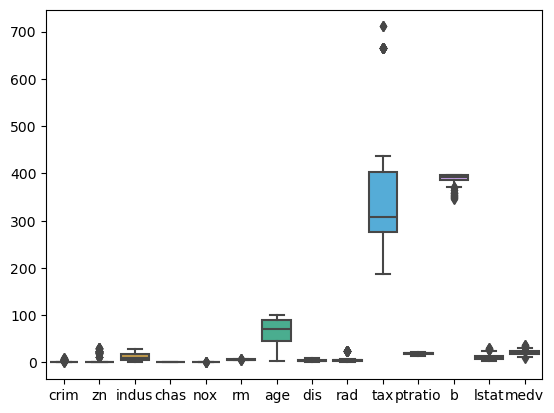

In [26]:
# box plot after handeling outliers
sns.boxplot(data=boston_cleaned[numerical_columns])

#### Identify categorical variables 

In [15]:
# Method 1: Using pandas data types
print("Data types of each column:")
print(boston.dtypes)

Data types of each column:
crim       float64
zn         float64
indus      float64
chas         int64
nox        float64
rm         float64
age        float64
dis        float64
rad          int64
tax          int64
ptratio    float64
b          float64
lstat      float64
medv       float64
dtype: object


#### There is no categorical variables in the dataset.

### Normalization and Standardization numerical features.

In [16]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [17]:
# Identify numerical columns
numerical_columns = boston.select_dtypes(include=['int64', 'float64']).columns
print("\nNumerical columns:")
print(numerical_columns)


Numerical columns:
Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'b', 'lstat', 'medv'],
      dtype='object')


In [18]:

# Standardization
scaler = StandardScaler()
boston_standardized = boston.copy()
boston_standardized[numerical_columns] = scaler.fit_transform(boston[numerical_columns])

In [19]:
print("\nFirst few rows of the standardized dataset:")
print(boston_standardized.head())


First few rows of the standardized dataset:
       crim        zn     indus      chas       nox        rm       age  \
0 -0.419782  0.284830 -1.287909 -0.272599 -0.144217  0.413672 -0.120013   
1 -0.417339 -0.487722 -0.593381 -0.272599 -0.740262  0.194274  0.367166   
2 -0.417342 -0.487722 -0.593381 -0.272599 -0.740262  1.282714 -0.265812   
3 -0.416750 -0.487722 -1.306878 -0.272599 -0.835284  1.016303 -0.809889   
4 -0.412482 -0.487722 -1.306878 -0.272599 -0.835284  1.228577 -0.511180   

        dis       rad       tax   ptratio         b     lstat      medv  
0  0.140214 -0.982843 -0.666608 -1.459000  0.441052 -1.075562  0.159686  
1  0.557160 -0.867883 -0.987329 -0.303094  0.441052 -0.492439 -0.101524  
2  0.557160 -0.867883 -0.987329 -0.303094  0.396427 -1.208727  1.324247  
3  1.077737 -0.752922 -1.106115  0.113032  0.416163 -1.361517  1.182758  
4  1.077737 -0.752922 -1.106115  0.113032  0.441052 -1.026501  1.487503  


In [20]:
# Normalization
normalizer = MinMaxScaler()
boston_normalized = boston.copy()
boston_normalized[numerical_columns] = normalizer.fit_transform(boston[numerical_columns])

In [21]:
print("\nFirst few rows of the normalized dataset:")
print(boston_normalized.head())


First few rows of the normalized dataset:
       crim    zn     indus  chas       nox        rm       age       dis  \
0  0.000000  0.18  0.067815   0.0  0.314815  0.577505  0.641607  0.269203   
1  0.000236  0.00  0.242302   0.0  0.172840  0.547998  0.782698  0.348962   
2  0.000236  0.00  0.242302   0.0  0.172840  0.694386  0.599382  0.348962   
3  0.000293  0.00  0.063050   0.0  0.150206  0.658555  0.441813  0.448545   
4  0.000705  0.00  0.063050   0.0  0.150206  0.687105  0.528321  0.448545   

        rad       tax   ptratio         b     lstat      medv  
0  0.000000  0.208015  0.287234  1.000000  0.089680  0.422222  
1  0.043478  0.104962  0.553191  1.000000  0.204470  0.368889  
2  0.043478  0.104962  0.553191  0.989737  0.063466  0.660000  
3  0.086957  0.066794  0.648936  0.994276  0.033389  0.631111  
4  0.086957  0.066794  0.648936  1.000000  0.099338  0.693333  


#### Split the data into training and testing sets.

In [22]:
# Splitting the dataset into features (X) and target (y)
X = boston.drop('medv', axis=1)  # Assuming 'medv' is the target variable
y = boston['medv']

In [23]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [24]:
# Displaying the shapes of the resulting splits
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (404, 13)
Shape of X_test: (102, 13)
Shape of y_train: (404,)
Shape of y_test: (102,)
